# auto encoder using fully connecting layers and use encoder and decoder form auto encoder

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
# Add Gaussian noise to images
# Gaussian noise:- kind of signal noise that has a probability density function (pdf) equal to that of the normal distribution
def add_gaussian_noise(images, mean, std):
    noise = np.random.normal(mean, std, images.shape)
    noisy_images = images + noise
    return np.clip(noisy_images, 0.0, 1.0)

In [3]:
# Load and preprocess the RGB images
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test
# Flatten the RGB images
x_train_flat = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flat = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [4]:
# Define the input layer
input_img = Input(shape=(3072,))

# Encoder
encoded = Dense(1000, activation='relu')(input_img)

# Decoder
decoded = Dense(3072, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Separate the encoder and decoder models
encoder = Model(input_img, encoded)

# Decoder model
encoded_input = Input(shape=(1000,))
decoder_layer = autoencoder.layers[-1]  # Retrieve the last layer of the autoencoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


In [5]:
# Train the autoencoder
#autoencoder.fit(x_train_flat, x_train_flat, epochs=30)
autoencoder.fit(x_train_flat, x_train_flat, epochs=50, batch_size=128, shuffle=True)

Epoch 1/50

391/391 [==============================] - 5s 7ms/step - loss: 0.6140

Epoch 2/50

391/391 [==============================] - 2s 5ms/step - loss: 0.5888

Epoch 3/50

391/391 [==============================] - 2s 6ms/step - loss: 0.5800

Epoch 4/50

391/391 [==============================] - 2s 5ms/step - loss: 0.5744

Epoch 5/50

391/391 [==============================] - 2s 5ms/step - loss: 0.5714

Epoch 6/50

391/391 [==============================] - 2s 6ms/step - loss: 0.5697

Epoch 7/50

391/391 [==============================] - 2s 6ms/step - loss: 0.5684

Epoch 8/50

391/391 [==============================] - 2s 5ms/step - loss: 0.5673

Epoch 9/50

391/391 [==============================] - 2s 5ms/step - loss: 0.5665

Epoch 10/50

391/391 [==============================] - 2s 5ms/step - loss: 0.5659

Epoch 11/50

391/391 [==============================] - 2s 5ms/step - loss: 0.5653

Epoch 12/50

391/391 [==============================] - 2s 6ms/step - loss: 0.5650

E

In [6]:
# Use the trained autoencoder to encode and decode images
encoded_images = encoder.predict(x_train_flat)
decoded_images = decoder.predict(encoded_images)

# Reshape the decoded images back to the original shape
decoded_images_reshaped = decoded_images.reshape(x_train.shape)

1563/1563 [==============================] - 3s 2ms/step

1563/1563 [==============================] - 2s 1ms/step


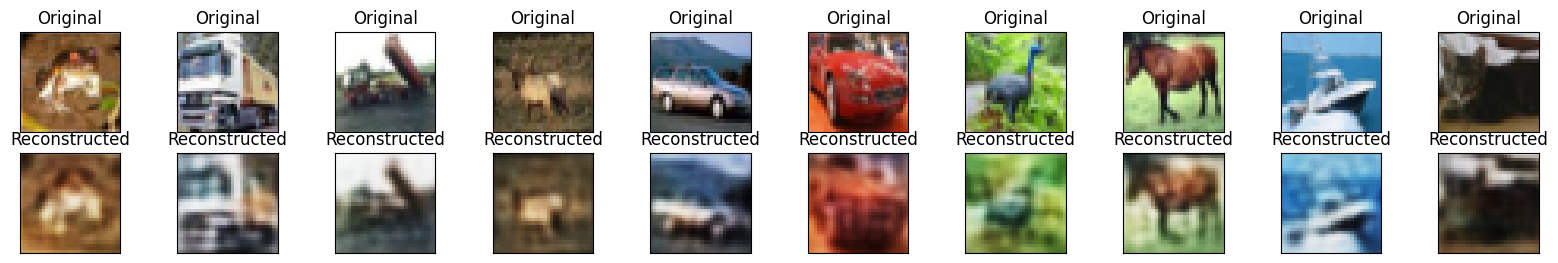

In [7]:
# Visualize original and reconstructed images
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # Original image
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_train[i])
    plt.title("Original")

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed image
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(decoded_images_reshaped[i])
    plt.title("Reconstructed")

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [8]:
# Add Gaussian noise to images
mu = 0
sigma = 0.1

noisy_images = add_gaussian_noise(x_train_flat, mu, sigma)
noisy_images_encoded=encoder.predict(noisy_images)
noisy_images_decoded=decoder.predict(noisy_images_encoded)
# Reshape the decoded images back to the original shape
noisy_images_reshape = noisy_images_decoded.reshape(x_train.shape)
noisy_photo = noisy_images.reshape(x_train.shape)

1563/1563 [==============================] - 2s 1ms/step

1563/1563 [==============================] - 2s 1ms/step


In [9]:
# Add Gaussian noise to codes

noisy_code_encoded=encoder.predict(x_train_flat)
noisy_code= add_gaussian_noise(noisy_code_encoded, mu, sigma)
noisy_code_decoded=decoder.predict(noisy_code)
# Reshape the decoded images back to the original shape
noisy_code_decoded = noisy_code_decoded.reshape(x_train.shape)

1563/1563 [==============================] - 3s 2ms/step

1563/1563 [==============================] - 2s 1ms/step


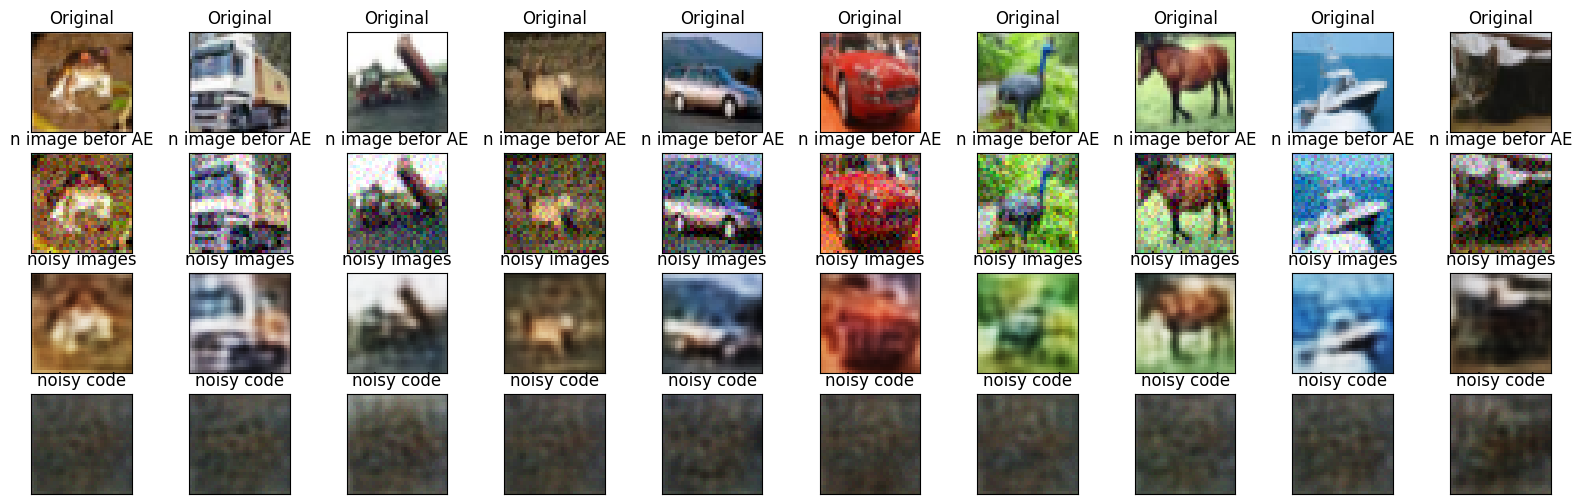

In [10]:
# Visualize original and reconstructed images
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # Original image
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_train[i])
    plt.title("Original")

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # noisy image befor autoencoder
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(noisy_photo[i])
    plt.title("n image befor AE")

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # noise image
    ax = plt.subplot(4, n, i + 1 + 2*n)
    plt.imshow(noisy_images_reshape[i])
    plt.title("noisy images")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # noise code
    ax = plt.subplot(4, n, i + 1 + 3*n)
    plt.imshow(noisy_code_decoded[i])
    plt.title("noisy code")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.show()


# auto encoder using cnn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load and preprocess the CIFAR-10 dataset (you can replace this with your own RGB dataset)
(x_train, _), (_, _) = cifar10.load_data()
x_train_orignal = x_train.astype('float32') / 255.0


170498071/170498071 [==============================] - 2s 0us/step


In [3]:
# Add Gaussian noise to images
# Gaussian noise:- kind of signal noise that has a probability density function (pdf) equal to that of the normal distribution
def add_gaussian_noise(images, mean, std):
    noise = np.random.normal(mean, std, images.shape)
    noisy_images = images + noise
    return np.clip(noisy_images, 0.0, 1.0)


In [4]:
# Define the input layer
input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded_cnn = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
decoder_input = Input(shape=(8, 8, 64))  # Adjust the shape based on the shape of the encoded layer
x = UpSampling2D((2, 2))(decoder_input)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded_cnn = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Create the encoder model
encoder_cnn = Model(input_img, encoded_cnn)

# Create the decoder model
decoder_cnn = Model(decoder_input, decoded_cnn)

# Create the autoencoder model
autoencoder_cnn = Model(input_img, decoder_cnn(encoded_cnn))

# Compile the autoencoder model
autoencoder_cnn.compile(optimizer='adam', loss='mean_squared_error')

# Print the summary of the autoencoder model
autoencoder_cnn.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 model_1 (Functional)        (None, 32, 32, 3)         1933

In [5]:
# Train the autoencoder
autoencoder_cnn.fit(x_train_orignal, x_train_orignal, epochs=20, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 15s 14ms/step - loss: 0.0113 - val_loss: 0.0064
Epoch 2/20
313/313 [==============================] - 3s 10ms/step - loss: 0.0054 - val_loss: 0.0049
Epoch 3/20
313/313 [==============================] - 3s 9ms/step - loss: 0.0045 - val_loss: 0.0041
Epoch 4/20
313/313 [==============================] - 3s 9ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 5/20
313/313 [==============================] - 3s 9ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 6/20
313/313 [==============================] - 3s 9ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 7/20
313/313 [==============================] - 3s 9ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 8/20
313/313 [==============================] - 3s 9ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 9/20
313/313 [==============================] - 3s 9ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 10/20
313/313 [==============================] - 3s 9ms/step - loss: 0.0029 - val_loss: 0.0

In [6]:
# Use the trained autoencoder to encode and decode images
encoded_images_cnn = encoder_cnn.predict(x_train_orignal)
decoded_images_cnn = decoder_cnn.predict(encoded_images_cnn)

1563/1563 [==============================] - 2s 1ms/step


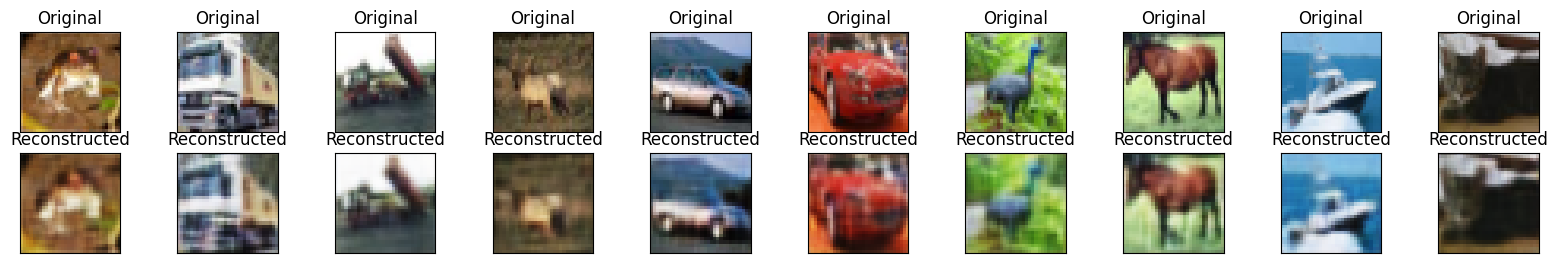

In [7]:
# Visualize original and reconstructed images
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # Original image
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_train_orignal[i])
    plt.title("Original")

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed image
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(decoded_images_cnn[i])
    plt.title("Reconstructed")

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [8]:
# Add Gaussian noise to images
mu = 0
sigma = 0.1

noisy_images_cnn = add_gaussian_noise(x_train_orignal, mu, sigma)
encoded_from_noisy_images = encoder_cnn.predict(noisy_images_cnn)
decoded_from_noisy_images = decoder_cnn.predict(encoded_from_noisy_images)



1563/1563 [==============================] - 2s 1ms/step


In [9]:
# Add Gaussian noise to noisy code
encoded_for_noisy_code = encoder_cnn.predict(x_train_orignal)

noisy_code_cnn = add_gaussian_noise(encoded_for_noisy_code, mu, sigma)

decoded_from_noisy_code = decoder_cnn.predict(noisy_code_cnn)


1563/1563 [==============================] - 2s 2ms/step


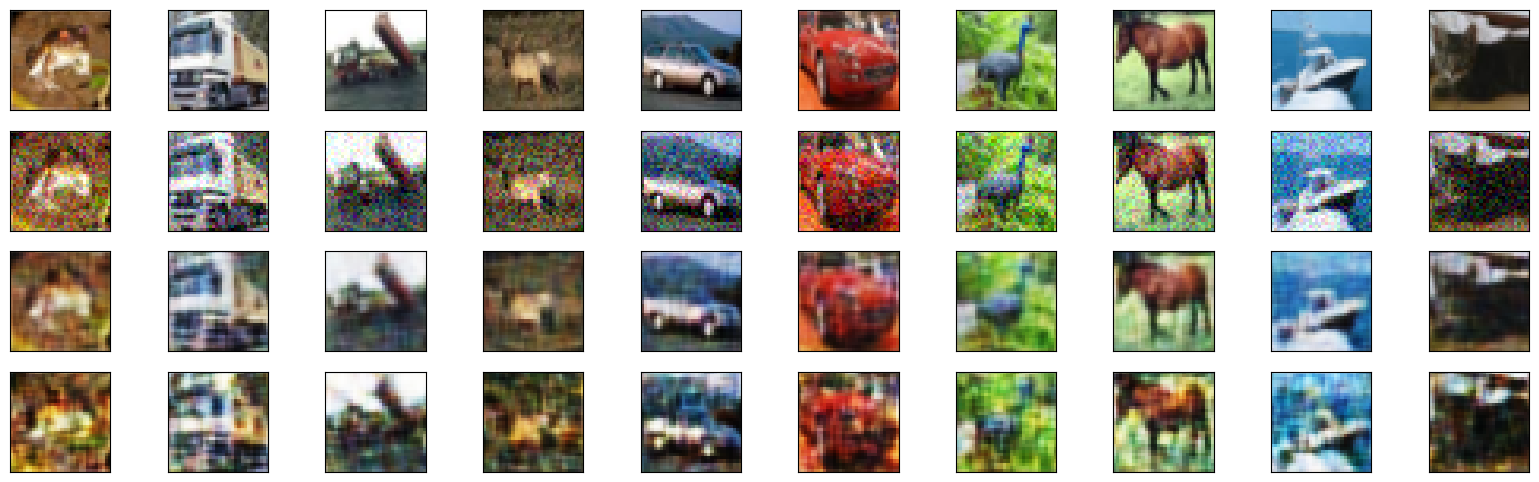

In [10]:
# Visualization
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original Images
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_train_orignal[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy Images
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(noisy_images_cnn[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised Images (from Noisy Images)
    ax = plt.subplot(4, n, i + 1 + 2*n)
    plt.imshow(decoded_from_noisy_images[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised Images (from Noisy Code)
    ax = plt.subplot(4, n, i + 1 + 3*n)
    plt.imshow(decoded_from_noisy_code[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
